# Artificial Intelligence Topic 4: Machine Learning

## Week 5: Introduction, Ethics and types


## This Week:
###  Background
- What is ML: recap
- Types of ML
- Ethical Considerations
- Creating and Using Data

###  Types of Machine Learning
- Unsupervised Learning
 - K-Means as an example
- Reinforcement Learning


### Next few weeks: 
- Supervised Machine Learning, 
- Artificial Neural Networks 

## Recap:<img style="float:right" width=300 src="./figures/ML/basic-model-fitting.png">
- Machine Learning is:
 - the application of inductive logic to a dataset
 -  to create useful predictive models.  
 - So it is about solving  modelling problems
 

- In week 1 we learned that problem solving is what you do when one of  
  Input > Model –> Output     is missing
- In the last topic we looked at how we **manually** create models encoding human expertise
- Machine Learning is about how you **automatically** create models  from data (inputs and outputs)


## So it’s all about the data?

### Yes!

The aim is to build ML systems that can be used to do things when data or scenarios arise. 

So we need data to: 
- train them on,  
- choose between models, 
- Know (estimate) how well they are going to do when we start using them

We may not always have an output for every input 
- Because they’re not possible to capture
  - e.g. data from scientific experiments such as genomics, astrophysics,...
- Because sometimes we have to wait a while e.g.,
  - game playing
  - finding human volunteers to label images/ caption videos,...

## Types of Machine Learning
Type | Inputs | Outputs | Feedback | What drives search? | Examples
-----|--------|---------|----------------|---------------------|---------------------
**Supervised** | Data |Predictions for each case | Correct labels | Accuracy of predictions made | **Recognition**  speech, images, actions, **Forecasting**
**Reinforcement**| Scenarios | Actions to take in different states | Periodic Rewards | Expected future feedback | Learning game strategy
**Unsupervised** | Data| Groupings of similar items | None | Statistics about cluster *coherence* and separation | Recommender systems, search engines



## Ethics: *Can* we use the data?
- GDPR,  Privacy policies affect how it is collected
- The law is very clear that we have to give people the right to:
  - Provide Informed Consent about  how we are going to use their personal data at the time we collect it
  - Find out what information we hold about them
  - Withdraw their data (e.g. “right to forget”)

- Examples of unethical use:    
 - Cambridge Analytica,   
 - targeting of fake news, propaganda on social media

- Nowadays there should be clear collaboration agreements describing who is the data controller and who is the data processor


## Ethics: *Should* we use the data? <img src="figures/ML/algorithms-of-oppression.png" style="float:right" width = 100> 
<img style="float:right" src="figures/ML/protected-characteristics.png" width = 400>

- ML is only as good as the data we give it
- So we have to be very careful that the data is representative

- Examples of problems:
  - Microsoft's (abandoned) Tay Bot
  - Google's (heavily modified) Image Recognition
  - Police offender profiling
  - Amazon's (abandoned) hiring policies

Quick Video from Cog-x

[![AI Ethics with Dong Nguyen, The Alan Turing Institute | CogX17 Highlight | CogX](https://img.youtube.com/vi/v=M-ko82Y0GUQ/0.jpg)](https://www.youtube.com/watch?v=M-ko82Y0GUQ)

## Unsupervised Learning <img src="figures/ML/clustering.png" style="float:right" width=400>
- Don’t have labels but we still want to find useful groups
- All data is defined in terms of values for features
  - Numbers,  categories (colour, name, Uni course),  or even just present-absent
- So we define distance measure d(a,b) between two data items a and b.
  - Hamming Distance (number of features where a and b differ)
  - Euclidean (straight line) distance for continuous numbers
- Typically in clustering we look for a way of putting the data items into k clusters
  - We don't have labels for outputs
   - so drive search between models to maximise *Quality of Clustering*
  - intercluster distance (max value of  d(a,b) for all a,b, in the cluster) is minimized
  - Intracluster distance (min value of d(a,c) for a and c in different clusters) is maximised


## K-Means <img src = "https://dashee87.github.io/images/kmeans.gif" style="float:right">
Probably the best known clustering algorithm  

**Init**: Pick K data points as initial cluster “centroids”  

**Loop**: until no changes in total sum_squared_distance:  
Step 1: Assign items to clusters  
  For each data point i:
 - calculate distance d(i,C_k) to each of the centroids C_k, k in (1,,,K)
 - assign datapoint to cluster k* with nearest centroid
 
Step 2: Check to see if there algorithm has converged
 - if no items have moved clusters **FINISH**
 
Step 3 Foreach cluster k in (1...K):
 - find members
 - Calculate sum of squared distances of cluster elements to centroid \sum d(i,k)^2
 - Set new cluster centroid C_k =  mean position of  points in cluster
   
    
 Example from https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
   
 


In [2]:
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import random, numpy as np
plt.figure(figsize=(5, 5))

def PlotCluster(X,labels,cents, iteration):
    # show a scatter plot  coloured by labels
    fig = plt.scatter(X[:, 0], X[:, 1], c=labels)
    for k in range(cents.shape[0]):
        plt.plot(cents[k][0],cents[k][1], marker = '*',color='r',markersize=12)
    plotTitle= "Cluster membership and centroids: iteration " + str(iteration) 
    title= plt.title(plotTitle)
    plt.show()



<Figure size 360x360 with 0 Axes>

In [11]:
K=4
numItems=100
# make a random 2D data set with 100 points and 4 clusters
X,y = make_blobs(n_samples=numItems, n_features=2,centers= K)

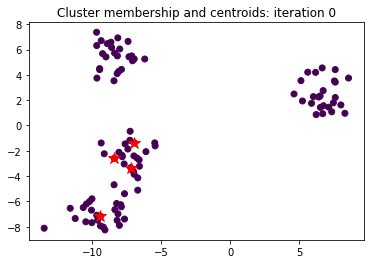

In [14]:
#  pick randomK starting points as the initial cluster centres
idx = np.random.randint(numItems, size=K)
centres = X[idx,:]

# to start with nothing is assigned to a cluster
labels = np.ones(X.shape[0])    
PlotCluster(X,labels,centres,0)    

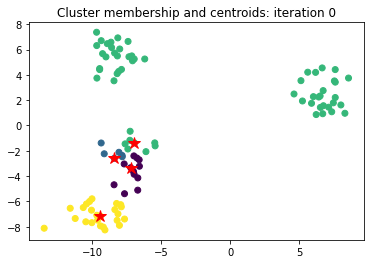

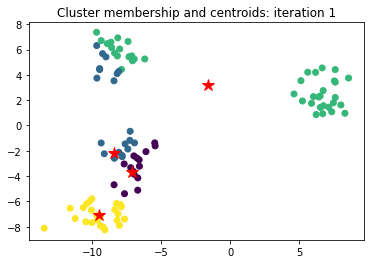

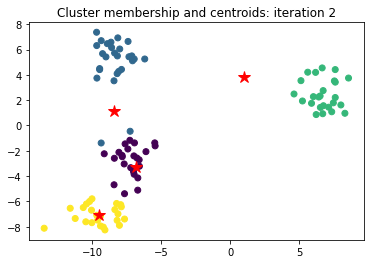

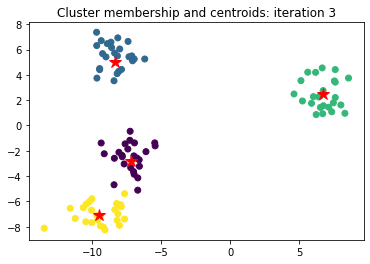

No items changed cluster in iteration 4


In [15]:
    
# now repeatedly call KMeans to do one iteration
for iteration in range(10):
    # Step 1: assign items to  clusters
    dist = euclidean_distances(X, centres) # dist is an array of size [numItems][K]
    newlabels = np.argmin(dist, axis=1) #newlabels is [numItems][1]

    # Step 2: check to see if anything has moved
    if(np.array_equal(labels, newlabels)): # we're done
        print ("No items changed cluster in iteration {}".format(iteration))
        break
    else: # plot new clusters
        labels=newlabels
        PlotCluster(X,labels,centres,iteration)  
    
    # Step 3: loop through each cluster finding mean position of its members
    for cluster in range (K):
        # get members
        clusterMembers=np.empty((0,2))
        for item in range(numItems):
            if (labels[item]==cluster):
                clusterMembers = np.vstack((clusterMembers,X[item]))

        # set centroids to new mean values  or [0,0] if cluster empty     
        if(clusterMembers.shape[0]==0):
            print('no items in cluster {}'.format(cluster))
            centres[cluster]=[0,0]
        else:
            centres[cluster] = clusterMembers.mean(axis=0)


       
        

    


## Of course you wouldn't normally write your own version...

Highly optimised versions available in well-established frameworks e.g. Weka (Java), scikit-learn (python).

`class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001,...)`  
 - defult number of clusters
 - variety of "smart" initialisation schemes
 - n_init: number of repeats it does before returning the best
 
Object attributes include: 
- `cluster_centers` :ndarray of shape (n_clusters, n_features)
- `labels`  : ndarray of shape (n_samples,)
- `inertia` : float (Sum of squared distances of samples to their closest cluster center.)

 
Methods include: 
- `fit(X[, y, sample_weight])` : Compute k-means clustering.
or this estimator.
- `predict(X[, sample_weight])` : Predict the closest cluster each sample in X belongs to.
- `fit_predict(X[, y, sample_weight])` : Compute cluster centers and predict cluster index for each sample.
- `get_params([deep])` : Get parameters f
- `score(X[, y, sample_weight])` : Opposite of the value of X on the K-means objective.
- ...


## K-Means Strengths and weaknesses 
<img src="figures/ML/kmeans_clustering_examples.png" style="float:right">

### PROS: 
- fast, 
- lots of implementations

### CONS:
- need right value of K, 
- results depend on starting points

### Assumptions:
- all features are relevant, 
- data is "globular" with respect to the current features

### How could we fix the counter-example?

## Reinforcement Learning
Five minute video.

[![Reinforcement learning for bar-tenders](https://img.youtube.com/vi/v=m2weFARriE8/0.jpg)](https://www.youtube.com/watch?v=m2weFARriE8)
https://www.youtube.com/watch?feature=oembed&v=m2weFARriE8

## Reinforcement Learning <img src="figures/ML/RL.png" style="float:right" width=400>
Q learning was best known initial algorithm
- Basic idea is that you have a *Reward* table R
 - which tells you what reward you get if you are in state s and take action a
 - for a multi-step problem the immediate rewards might be zero for many states  
  e.g. finding your way out of a maze, playing tic-tac-toe (noughts and crosses)  
  ... 
- Uses repeated trials to learn a Quality table Q:  
  one row for each  state *s*,  one column for each action *a*
 - Start exploring, and build up a list of what states you have been in [*s(1)*,*s(2)*,...,*s(t)*],  
   and actions you have taken [*a(1)*, *a(2)*, ..., *a(t)*]
 - If at time  *t* you get a reward *r*  
   then Q[*s(t)*][*a(t)*]  is increased by *r*  
   and the previous steps get a 'discounted' reward too    
    e.g. Q[*s(t-1)*][*a(t-1)*] is increased by  0.9 * *r*  
    ...
- Over time the Q table learns the best sequences of moves to take,  
   so you can use it to pick the next move
    
- Problems with scalability as numbers of  
  possible states and actions increase

## Deep Reinforcement Learning  <img src="figures/ML/AlphaGoZero.png" style="float:right" width=200>
- neural net rather than table 
- tends to learn “end-to-end”  rather than a Q table and a policy table
  E.g. Alpha Go, Atari simulator
- Relies on lots of data:  
  e.g. Unity: ‘learning brain’
  From ml-agents toolkit
 Links out to tensorflow model
 
- Alpha Go Zero:   
  learned by playing itself!
  image from https://medium.com/syncedreview/alphago-zero-approaching-perfection-d8170e2b4e48
 
 Really nice explanation of Q-learning here: http://mnemstudio.org/path-finding-q-learning-tutorial.htm
 

## Supervised Learning
Basic idea: Models divide up “decision space” into regions


Search for model is driven by accuracy

Form depends on what the ouputs can be
- Two class:  0/1 loss 
- Many class: Cross entropy 
- Continuous: mean squared error

Types of models we’ll look at:
- K Nearest Neighbours
- Greedy Rule Induction
- Naïve Bayes
- Artificial Neural Nets

**Classification** algorithms put labels on regions

**Regression** algorithms compute a function in regions. 

Image showing apples and oranges dataset with labels

## The basic supervised learning process
1. Choose features according to what kind of data you have available
2. Decide what types of model might be appropriate 
 - human readable?,   
 - type and amount of data?    
3. Initialise Model 
4.  While not finished:
  - See how well it does on training set
 - Adapt model to reduce error on training set
5.  Try to estimate how good it is

Often do steps 3-5 above in parallel with different types of model or metaparameters
E.g. max number of rules, max depth of trees, value of k in kNN, learning rates in ANN   


## How we use our data <img src="figures/ML/using_data.png" style="float:right" width=300>

### Unsupervised Learning: 
- Estimate of quality is based on whole dataset,  
  so use it all for training

### Reinforcement learning:
- Problem is usually lack of data compared to size of state-action space.  
- Because data is only generated by using the algorithm!
- Alternate periods of:
  - training (explore state-action-reward space to improve model)
  - testing (choose current max predicted reward in each state) 
  
### Supervised learning:
Most commonly work in *off-line* or  *batch* mode 
- Random split of the data into separate test set, training set, and sometimes validation set
- Final model then built using all the data available
